<a href="https://colab.research.google.com/github/xCHMNx/Math152/blob/main/P4M_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Repetition and benchmarking

Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [ ]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [ ]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [ ]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [ ]:
import numpy as np # First we have to load the package.

In [ ]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [ ]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [ ]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [ ]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [ ]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [ ]:
%timeit make_sq_1(1000)

10000 loops, best of 5: 122 µs per loop


In [ ]:
%timeit make_sq_2(1000)

The slowest run took 4.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 94.2 µs per loop


In [ ]:
%timeit make_sq_3(1000)

10000 loops, best of 5: 77.9 µs per loop


In [ ]:
%timeit make_sq_4(1000)

The slowest run took 237.48 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.08 µs per loop


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

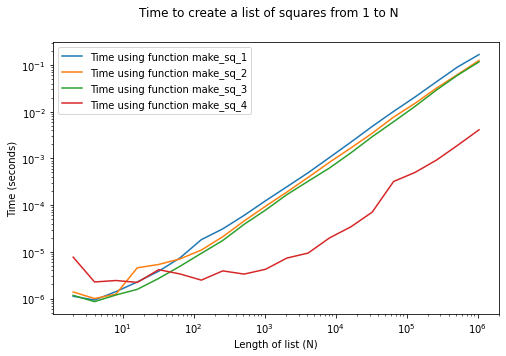

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises

1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

Put your solutions here.

## Solutions

**Exercise 1**: Interpret the plot.

For long list, the fastest method is clearly `make_sq_4` which uses numpy to make array multiplication very quick. We can see from the plot that this fourth method is over 10 times quicker than the others when generating a list of squares up to a number near 1 million. For short lists however, it appears that method four is actually the slowest. Instead, methods one and three, functions `make_sq_1` and `make_sq_3` respectively seem to be the fastest for very small N. However, generally method three seems to be the fastest for shorter lists. It appears that the fourth method becomes the fastest for lists with a length between 10 and 100 elements. From the graph, it seems this value is around 40 or 50. In other words, one should switch to the fourth method by the time one is working with lists of around 100 elements and this method is then the fastest, at least up until lists containing 1 million elements.

**Exercise 2**: Add a fifth way of computing the list.

I wanted to see how much method three would be slowed down if the squaring was done by a call to another function. To do this, I used the numpy power function. This uses the same list comprehension as method three, just with an additional function call.

In [ ]:
def make_sq_5(N):
  return [np.power(n, 2) for n in range(N)]

In [ ]:
make_sq_5(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Here is the same plot again, with this fifth method.

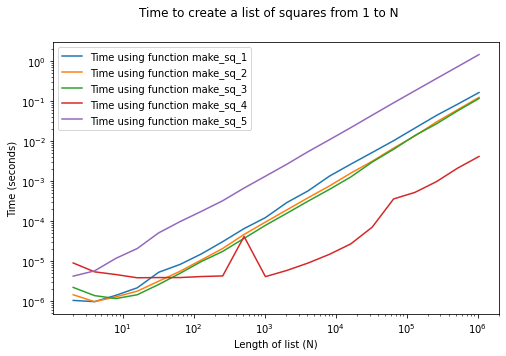

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4, make_sq_5]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Interestingly, just adding this extra function call to the numpy power function instead of multiplying the numbers directly made the function much slower. For most of the values tested, this fifth function is pretty much 10 times slower than the equivalent third method which doesn't have that function call. This is an interesting result and implies that either adding an extra function call is much slower than multiplying directly, or the numpy function multiplies much slower than normal multiplication. Given that numpy is good at performing arithmetic quickly, it is probably the case that the function calls are much slower than simple multiplication.

**Exercise 3**: The inflate function.

To perform this operation, I create an empty string and then iterate through the indices and letters, appending a number of multiples of each letter equal to the index plus one to the end of the new string.

In [ ]:
def inflate(S):
  """
  Take input string S and return a string in which the 1st letter appears once,
  the second letter appears twice, and so on.
  Must use for j, letter in enumerate(S) and no other loops.
  """
  inflated_s = ""
  for j, letter in enumerate(S):
    inflated_s += letter*(j+1)
  return inflated_s

In [ ]:
# Testing the function
print(inflate("Hello"))
print(inflate("abcde"))

Heelllllllooooo
abbcccddddeeeee


# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

**Note** I chose to complete Challenges 2 and 4.

## Challenge 1

If $N$ is a positive integer, then $r_3(N)$ is the number of ways that $N$ can be expressed as the sum of three squares.  Order and sign matter, so for example
$$6 = 1^2 + 1^2 + 2^2 = (-1)^2 + 1^2 + 2^2 = 2^2 + (-1)^2 + (-1)^2 = \cdots$$
These are all different ways of expressing 6 as the sum of three squares.  In fact, $r_3(6) = 8 \cdot 3 = 24$.  The 8 comes from the fact that there are eight sign-choices, and the 3 comes from the three orderings (1,1,2) and (1,2,1) and (2,1,1).

In other words, $r_3(N)$ is the number of elements in the following set:
$$\{ (a,b,c) \in {\mathbb Z}^3 : a^2 + b^2 + c^2 = N \}.$$

Write a function that computes $r_3(N)$ as efficiently as you can, for somewhat large values of $N$ (e.g., $N \approx 1000$).

You can check whether your function is behaving correctly, by comparing to the values found at the [Online Encyclopedia of Integer Sequences](https://oeis.org/A005875).




In [ ]:
def rep_three(N):
  return R # The result of your function should be R.

In [ ]:
rep_three(6) # This should output 24.

# Challenge 2

If $r$ is a positive real number, then the area of the circle of radius $r$ is $\pi r^2$.  If you place this circle around the origin, on a sheet of graph paper, then you will find *about* $\pi r^2$ "grid points" inside this circle.  The grid points inside the circle form the set
$$S = \{ (x,y) \in {\mathbb Z}^2 : x^2 + y^2 < r^2 \}.$$

Define $E(r) = \pi r^2 - \# S$ to be the "error" -- the difference between the area of the circle and the number of grid points within the circle.  

Create a plot with $r$ on the horizontal axis and $E(r)$ on the y-axis.  Try to accomplish this as efficiently as possible, where $r$ ranges from $0$ to $1000$.

Can you come up with a good bound $\vert E(r) \vert \leq f(r)$ for some nice function $f(r)$, just by looking at your plot?  I.e., your plot of $E(r)$ should be bounded above by the graph of $y = f(r)$ and below by the graph of $y = -f(r)$.  If you can come up with such a bound, plot it too.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

**Solution:** First, we create a function to count the number of points lying within a circle of radius r. Below I've written two such functions. The first is not very efficient as it tries all possible points within the circle. Also, it doesn't work with non-integer inputs as it uses for loops to do this search.

The second function is more efficient and works with floating point radii. In this one, I begin by counting just the points on one axis, not including the origin. This is done by first checking whether $r$ is a whole number or not. I check this by seeing if $r$ mod 1 is equal to 0, that is, if $r$ is an integer multiple of 1. If it is a whole number, then we don't include the point at distance $r$ along the axis, since we just choose points within the circle. This means that there are $r-1$ points along the axis. Since there are 4 axes which are identical, we add 4 times this number to the point count. If $r$ is not a whole number, then we actually include the point at distance $r$ as well, so we add 4 times $r$ points to the count.

Next, I count all the points in the first quadrant, but not on the axes. To do this, I iterate over all possible grid points. I could just check whether they were within the circle using the equation of the circle, but it is more efficient to first see if they lie within the square diamond shape formed by placing vertices on points $(\pm r, 0)$ and $(0, \pm r)$. To do this, I consider the diagonal line from $(0, r)$ to $(r, 0)$. This line has equation $y=-x+r$, so I can check whether a point is within this boundary by seeing if $x+y$ is less than $r$. Then, if a point is outside this, I use the equation of the circle and see if $x^2+y^2$ is less than $r^2$. For each point found in these ways, I add 4 to the total, since an equivalent point can be found in the other three quadrants.

Finally, I add the origin to complete the count.

In [ ]:
def count_grid_points_within_circle_inefficient(r):
  """
  Counts the number of grid points within a circle of radius r
  These are points satisfying x^2 + y^2 < r^2
  This function simply uses this condition to find all points.
  Note that this is a rather inefficient way of doing it.
  """
  points = 0
  r_sqr = r**2
  for i in range(-r+1, r):
    for j in range(-r+1, r):
      if i**2 + j**2 < r_sqr:
        points += 1
  return points

# A more efficient way of counting the points
def count_grid_points_within_circle(r):
  """
  Counts the number of grid points within a circle of radius r.
  These are points satisfying x^2 + y^2 < r^2.
  To count these, we first count the number of points along the positive x axis.
  Then, we count the points within the square diamond with
  vertices at (+-r, 0) and (0, +-r). This can be done by finding all
  points where x + y < r.
  Along the way, we check the remaining region within the circle using the 
  property x^2+y^2 < r. For both of these, we only count the points 
  in the first quadrant and multiply by 4. Finally, we add the origin.
  """
  # Return 0 if there is no radius
  if r == 0:
    return 0
  points = 0
  r_sqr = r**2
  # Count points along an axis
  # If r is not a whole number, add 4*r_floor grid points to the 
  # count instead of 4*(r-1)
  if r % 1 != 0:
    points += 4*int(r)
  else:
    points += 4*(r-1)
  # Count points in first quadrant, where x != 0, but y >= 0
  # Use while loops since r can be a float
  i = 1
  while i < r:
    j = 1
    while j < r:
      # Add points not on axes
      # Each one we find counts for 4, one in each quadrant
      # First, check if point is within square diamond
      if i + j < r:
        points += 4
      # else, check if it is between diamond and edge of circle
      elif i**2 + j**2 < r_sqr:
        points += 4
      j += 1
    i += 1
  # Add the origin
  points += 1
  return points

Let's compare the runtime of the inefficient method and the more efficient method for counting the number of grid points within a circle.

In [ ]:
def time_counting_function(f, loops, r):
  """
  Returns the average execution time of function f over loops number of loops
  using radius r.
  """
  time_total = 0
  for i in range(loops):
    start = time.time()
    f(r)
    end = time.time()
    time_total += end-start
  return time_total/loops

First, the average time for the inefficient method.

In [ ]:
loops = 20
radius = 500
print("Average runtime of function over {} loops with radius {} was {:.3f} seconds.".format(loops, radius, time_counting_function(count_grid_points_within_circle_inefficient, loops, radius)))

Average runtime of function over 20 loops with radius 500 was 0.592 seconds.


And the same computation for the more efficient method.

In [ ]:
loops = 20
radius = 500
print("Average runtime of function over {} loops with radius {} was {:.3f} seconds.".format(loops, radius, time_counting_function(count_grid_points_within_circle, loops, radius)))

Average runtime of function over 20 loops with radius 500 was 0.112 seconds.


Clearly, the second version of the counting function is quite a bit more efficient.

Here, we define the error function. This is simply the different between the area of the circle with radius $r$ and the number of grid points within the same circle.

In [ ]:
def E(r):
  """
  Return the 'error' between the area of a circle with radius r and the
  number of grid points within the circle.
  """
  return np.pi*r**2 - count_grid_points_within_circle(r)

We create a plot of the error $E(r)$ for different values of $r$.

In [ ]:
# Generate error values
radii = np.arange(0, 1000, 10)
errors = [E(radius) for radius in radii]

Interestingly, despite my efforts to make the counting of grid points efficient, it still takes most of a minute to compute the error values using these 100 radii.

Below is the plot containing the errors for 100 equally spaced radii from 0 to 1000. One thing I noticed which was initially surprising is that the error is sometimes negative. That is, the number of grid points contained within the circle is sometimes larger than the area of the circle. Though this initially seemed unlikely, it actually makes sense when one tries some examples. In some cases very small increases in radius can cause the circle to expand just enough to encompass a significant number of extra grid points, even though the area of the circle increases only marginally.

I've also plotted a somewhat plausible bounding function given by
$$f(r)=\pi^2\sqrt{r}$$
I came up with this by first trying a linear function based on $r$, but realizing that a square root function would fit the shape of the curve a bit better. Then it was a matter of finding a coefficient which would allow the bound to always be larger than the error. I found a value of 10 does a good job of this on these first error values up to a radius of 1000. Since this problem involves circles, I decided a more appropriate coefficient would be $\pi^2$, which is approximately $9.87$.

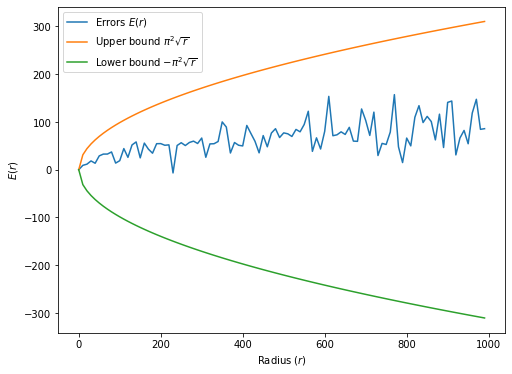

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(radii, errors, label="Errors $E(r)$")
ax.plot(radii, np.pi**2*np.sqrt(radii), label="Upper bound $\pi^2\sqrt{r}$")
ax.plot(radii, -np.pi**2*np.sqrt(radii), label="Lower bound $-\pi^2\sqrt{r}$")
plt.xlabel("Radius ($r$)")
plt.ylabel("$E(r)$")
ax.legend()
plt.show()

Here I check whether the bound works for all radii plotted above. Comparing numpy arrays returns an array of booleans where the comparison is applied componentwise. Then, I just check whether all those booleans are true.

In [ ]:
# Does this bound actually work?
if np.alltrue(np.abs(np.array(errors)) <= np.pi**2*np.sqrt(radii)):
  print("This bound holds for all errors in our list")
else:
  print("This bound does not hold for all errors in the list")

This bound holds for all errors in our list


Note that it's very possible that this bound fails for radii larger than 1000, either for radii just a bit bigger or for radii much larger. Also, a smaller coefficient on the square root function would probably provide a tighter bound, but it's hard to say just how big that coefficient must be, so I've left it with $\pi^2$.

# Challenge 3

The following result was found by Euler, but I've changed his numbers to $A$ and $B$ to make your life hard.

Theorem:  A prime number $p$ can be expressed in the form $x^2 + 3 y^2$ if and only if $p$ is congruent to $A$ modulo $B$ (i.e., `p % B == A`).  

Use experimental techniques to determine $A$ and $B$.  Now try the same for $3$ replaced by $4,5,6,7,8,9$. 

# Challenge 4

Pascal's triangle has $1$ in the first row, then $1, 1$ in the second rod, then $1,2,1$ in the third row, etc.  One can place these numbers in a triangle, with "rows" as diagonals, as drawn below.

1 1 1 1 1 1

1 2 3 4 5

1 3 6 10

1 4 10

1 5

1

Et cetera.

Turn these numbers into black and white dots, depending on whether they are even (black) or odd (white).  This produces an image like the following:

X X X X X X

X O X O X

X X O O

X O O

X X

X

Now perform this in PIL, to create an image that fills the top-left triangle in an image of at least 200 x 200 pixels.  You should *not* be computing giant numbers like 200 factorial!  Each row of Pascal's triangle can be computed from the previous by addition... and you can perform this "mod 2" all the way through.

Extra fun:  instead of black/white dots for even/odd, try colors based on remainders after dividing by three, by four, etc.


**Solution:** In this challenge, I first generate a list representation of Pascal's Triangle, where each element in the list is a list containing the values along that row of the triangle. I've set this up so that I can input a modulus that the function will reduce elements of the triangle with. This allows the construction of a large number of rows of the triangle without dealing with numbers much larger than the modulus. It also makes it easy to create an image of the resulting structure where colors depend on modular values.

In [ ]:
# Imports
from PIL import Image

In [ ]:
def generate_triangle(N, mod=None):
  """
  Generate a list representation of Pascal's triangel with N rows.
  Each row will be a sublist in the triangle list, with the first row
  being the first element, the second the second element, and so on.
  Reduce each element modulo mod if mod is not None.
  """
  # Triangle list, containing the first row
  triangle_list = [[1]]
  # For each successive row, the number of elements increases by 1, and the
  # first and last elements are always 1. To fill the elements in between,
  # one takes the previous row and creates sums from each element and the one after
  # it. These are then the elements for the new row.
  for i in range(N-1):
    previous_row = triangle_list[-1]
    new_row = [1]*(len(previous_row) + 1)
    # Sum each element and the one after in the previous row and replace the values
    # in between the 1's with those sums
    if mod:
      new_row[1:len(new_row)-1] = [(previous_row[index]+previous_row[index+1]) % mod for index in range(len(previous_row)-1)]
    else:
      new_row[1:len(new_row)-1] = [previous_row[index]+previous_row[index+1] for index in range(len(previous_row)-1)]
    triangle_list.append(new_row)
    #for j in range(1, len(new_row)-1):
  return triangle_list

In [ ]:
# First 5 rows of the triangle
print(generate_triangle(5))
# The first 5 rows of the triangle mod 2
print(generate_triangle(5, 2))

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]
[[1], [1, 1], [1, 0, 1], [1, 1, 1, 1], [1, 0, 0, 0, 1]]


The function below returns a numpy array representing the final image. One can give the function the modulus by which to reduce the values in Pascal's Triangle, as well as an array of colors that should be used to color those values. The array should have the same length as the size of the modulus, since there will be that many different values appearing in the triangle. By default, it reduces modulo 2 and colors the even numbers black and the odd numbers white. This function returns an NxN pixel image, where N is an input. In this way, the upper left half of the image is always exactly filled by the first N rows of Pascal's Triangle.

In [ ]:
# Create an image array which has NxN pixels and shows the values in Pascal's triangle along diagonals
def create_triangle_image(N, mod=2, colors=[np.array([0, 0, 0]), np.array([255, 255, 255])]):
  """
  Generate the first N rows of Pascal's triangle. Then, create an image
  where the rows of Pascal's triangle are placed along diagonals and the color
  depends on the value of the number modulo mod.
  The colors parameter is a list containing the colors which will be displayed depending
  on the value of the number modulo mod. The length of this list must be the same as
  the size of mod.
  """
  if len(colors) != mod:
    raise ValueError("Length of list of colors must match size of mod")
  # First, get the triangle with N rows, with values reduce modulo mod
  triangle = generate_triangle(N, mod)
  # Create an image array
  image_array = np.zeros((N, N, 3), dtype=np.uint8)
  # Fill the first row with the first element of each row in the triangle, the second
  # row in the image with the second elements, and so on
  # i keeps track of the row we are working with
  for i in range(N):
    # j keeps track of the pixel along that row we are looking at
    # we only increment j if the row of the triangle we are considering has a
    # value in the ith position
    j = 0
    for row in triangle:
      # The row must be long enough to have a value to place
      if len(row) > i:
        # Set the color equal to the value in the color array
        image_array[i, j] = colors[row[i]]
        j += 1
  return image_array

Here is a black and white version of the image, where pixels are black if the value in Pascal's triangle which is placed there is even and white if that value is odd.

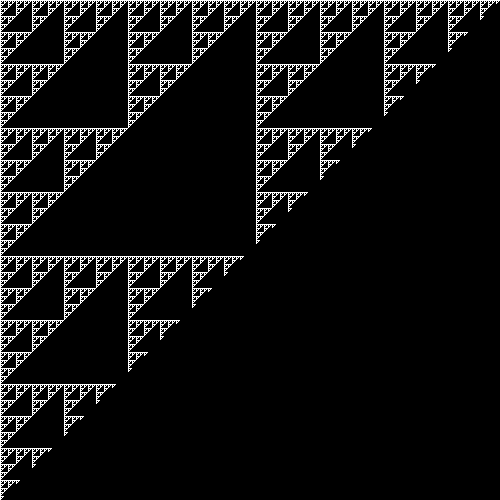

In [ ]:
# A black and white version mod 2
triangle_image = Image.fromarray(create_triangle_image(500))
display(triangle_image)

Here is a picture where the color depends on the value modulo 3. A pixel is black if the number is congruent to 0 mod 3, blue if it is congruent to 1 mod 3, and red if it is congruent to 2 mod 3.

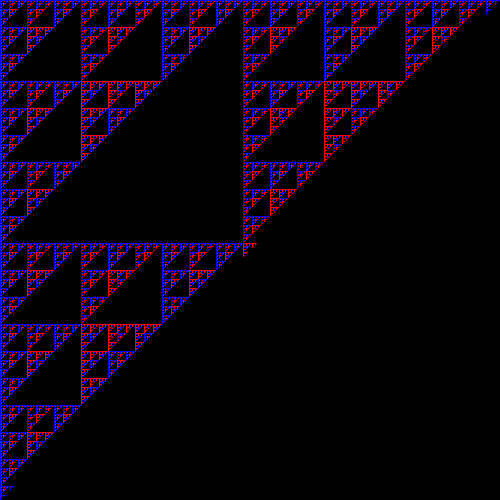

In [ ]:
# Black, Blue, and Red image
colors = [np.array([0, 0, 0]), np.array([0, 0, 255]), np.array([255, 0, 0])]
triangle_image = Image.fromarray(create_triangle_image(500, 3, colors))
display(triangle_image)

This image shows that blue and red values are quite mixed, though one gets triangles which are predominantly one or the other.

Below is another picture where the color depends on the value modulo 4. A pixel is black if the number is congruent to 0 mod 4, blue if it is congruent to 1 mod 4, red if it is congruent to 2 mod 4, and green if congruent to 3 mod 4.

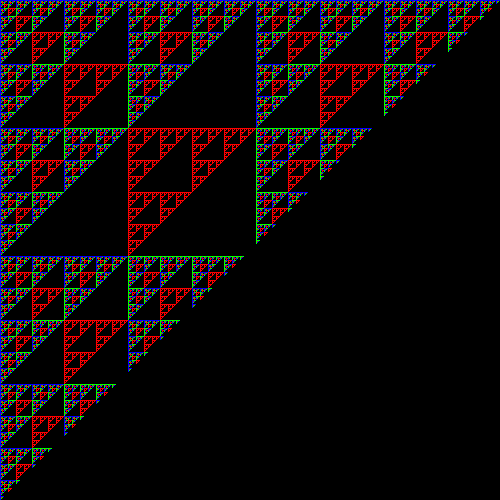

In [ ]:
# Black, Blue, Red, and Green image
colors = [np.array([0, 0, 0]), np.array([0, 0, 255]), np.array([255, 0, 0]), np.array([0, 255, 0])]
triangle_image = Image.fromarray(create_triangle_image(500, 4, colors))
display(triangle_image)

This image is interesting because we get large triangles where the only colors are red and black, meaning values in that region are congruent to 0 or 2 mod 4. The green and blue colors are a lot more mixed (values congruent to 1 or 3 mod 4), but one does get solid lines of these colors along the tops of trangles.

# Challenge 5

Often when visualizing time-series data, it makes sense to look not at day-by-day changes, but rather at a 7-day rolling average.  For example, when looking at Covid-19 cases, there are reporting fluctuations from day to day, so instead it is usually better to look at the average number of cases over the previous 7 days.

Write a function `def rolling(A, window=7):` which takes as input a one-dimensional numpy array `A`, and a parameter `window` whose default value is `7`.  The function must return an array `R` whose length is shorter than the length of `A`.  The entry `R[j]` should be the **average** of `A[j]`, `A[j+1]`, etc., up to `A[j+window-1]`.  

Then use this function and matplotlib to produce a plot:  a line plot of the array `A` produced below, and a line plot of the 7-day rolling average `R` produced by your function.  These plots should be on the same figure, and clearly labeled.


In [ ]:
# Here is the code to produce your test array A.
# Please use this array in your plot!

x_array = np.arange(300)
A = 5*(x_array/200)**2
A = A + np.random.random(len(A))

In [ ]:
# Please use this code to import matplotlib.
import matplotlib.pyplot as plt

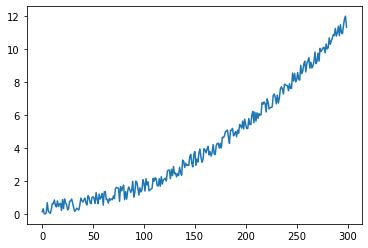

In [ ]:
# Here is a plot of the array, to get you started.  
plt.plot(x_array, A)

# Now it's time to write your function to produce the 7-day rolling average, add it to the plot, and make everything clear and labeled.